<a href="https://colab.research.google.com/github/virajbhutada/PRODIGY_ML_02/blob/main/Task_2_Customer_Segmentation_with_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML INTERN at PRODIGY INFOTECH
# Author: D. Sai Mourya Sri
# **Task** - **02**: Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

# Project Overview: Customer Segmentation with K-means Clustering

- Implemented advanced data analysis techniques to derive insights from a retail store's customer data.
- Utilized K-means clustering, a robust unsupervised machine learning algorithm, to explore customer behavior patterns.
- Examined key features such as 'Age,' 'Annual Income,' and 'Spending Score' to identify distinct customer segments.
- Applied the Elbow Method meticulously to determine the optimal number of clusters, ensuring precise segmentation.
- Created compelling visualizations, including a dynamic 3D graph, to illustrate comprehensive patterns within the customer data.
- Utilized the silhouette score to provide a quantitative measure of clustering quality and evaluation.
- Demonstrated the power of data-driven decision-making, enabling businesses to strategize, personalize, and optimize customer experiences with unparalleled precision.

Dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

# Import Libraries and Load Data
 Imports necessary libraries and loads the dataset into a Pandas DataFrame.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
# Read the dataset into a Pandas DataFrame
df = pd.read_csv('Mall_Customers.csv')
# Print the first few rows of the DataFrame to verify the data has been loaded successfully
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# Display basic information about the DataFrame
print("DataFrame Info:")
print(df.info())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [4]:
# Generate summary statistics of the numerical columns in the DataFrame
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your data into a pandas DataFrame
df = pd.read_csv('Mall_Customers.csv')

# Define features as the columns of your DataFrame (except the target variable)
features = df.drop('Age', axis=1)  # Assuming 'prices' is your target variable

# Now you can split your data into training and testing sets
X_train, X_test = train_test_split(features, test_size=0.2, random_state=42)

# Data Preprocessing and Feature Selection
Selects relevant features for clustering and standardizes the selected features using StandardScaler.



In [6]:
# Selecting the features for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [7]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'gender' is the column with categorical data
le = LabelEncoder()
X_train['Gender'] = le.fit_transform(X_train['Gender'])
X_test['Gender'] = le.transform(X_test['Gender'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Determine Optimal Number of Clusters and Apply K-means Clustering
 Determines the optimal number of clusters using the Elbow method and applies K-means clustering with the chosen number of clusters to the standardized features.

In [8]:
import numpy as np
scaled_features = X_train_scaled
scaled_features = np.vstack((X_train_scaled, X_test_scaled))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

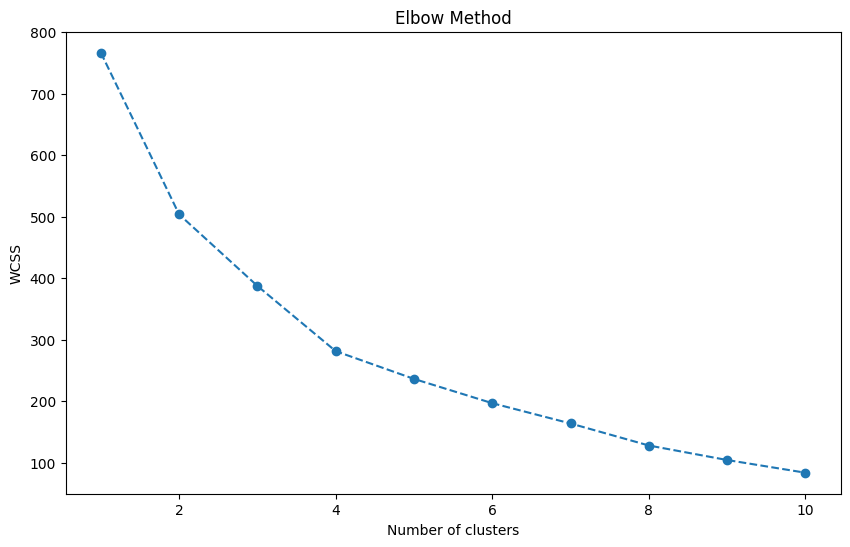

In [9]:
# Plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

The Elbow Method graph illustrates the relationship between the number of clusters (k) and the within-cluster sum of squares (WCSS). WCSS measures the compactness of clusters. The point where the rate of decrease in WCSS sharply changes represents the optimal number of clusters, as it balances cluster cohesion with model simplicity.

In [10]:
# Based on the elbow method, choose the optimal number of clusters
optimal_clusters = 5

In [11]:
# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_features)


In [12]:
# Apply K-means clustering to the training data with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
train_cluster_labels = kmeans.fit_predict(X_train_scaled)


In [13]:
# Train a KMeans model on the training data
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_train_scaled)

# Predict cluster labels for the training data
train_cluster_labels = kmeans.labels_

# Predict cluster labels for the test data
test_cluster_labels = kmeans.predict(X_test_scaled)

In [14]:
# Add cluster labels to the original data
X_train['Cluster'] = train_cluster_labels
X_test['Cluster'] = test_cluster_labels

In [15]:
# Train a KMeans model on the training data
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_train_scaled)

# Predict cluster labels for the training data
train_cluster_labels = kmeans.labels_

# Predict cluster labels for the test data
test_cluster_labels = kmeans.predict(X_test_scaled)

# Print the count of customers in each cluster
print("Training Data:")
print(pd.Series(train_cluster_labels).value_counts())

print("\nTest Data:")
print(pd.Series(test_cluster_labels).value_counts())

Training Data:
1    48
2    35
0    34
3    26
4    17
Name: count, dtype: int64

Test Data:
3    12
1    11
2    10
0     5
4     2
Name: count, dtype: int64


# Visualize the Clusters in 3D Plot
 Visualizes the clusters in a 3D scatter plot using the selected features (Age, Annual Income, and Spending Score) and different colors representing different clusters.

In [16]:
# Visualize the clusters (assuming 3D plot for Age, Annual Income, and Spending Score)
from mpl_toolkits.mplot3d import Axes3D


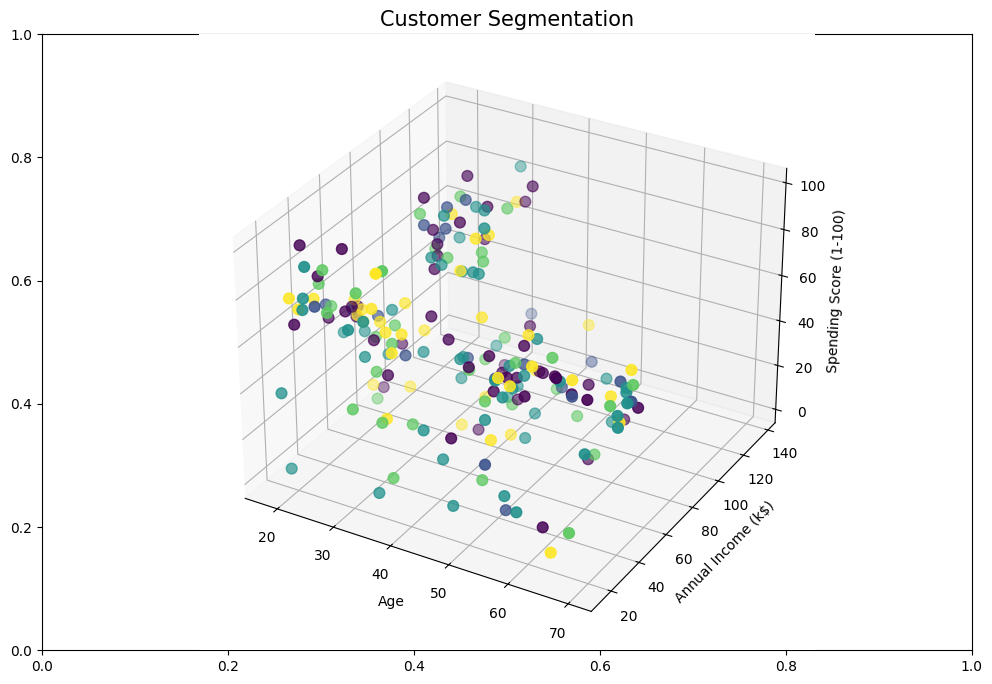

In [17]:
fig = plt.figure(figsize=(12, 8))
plt.title("Customer Segmentation", fontsize = 15)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features['Age'], features['Annual Income (k$)'], features['Spending Score (1-100)'], c=cluster_labels, cmap='viridis', s=60)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

The 3D graph visualizes the results of K-means clustering for customer segmentation. Each point represents a customer in a three-dimensional space defined by their 'Age,' 'Annual Income,' and 'Spending Score.' The distinct colors indicate different clusters created by the K-means algorithm. By grouping similar customers together, this graph helps businesses identify segments of customers with comparable spending behaviors, allowing for targeted marketing strategies and personalized customer services.

# Additional Visualizations for Cluster Analysis
Generates additional visualizations for cluster analysis, including:

# •  Pairplot:
Creates a pairplot to visualize the relationships between different pairs of features, colored by cluster labels.


200
(200, 5)


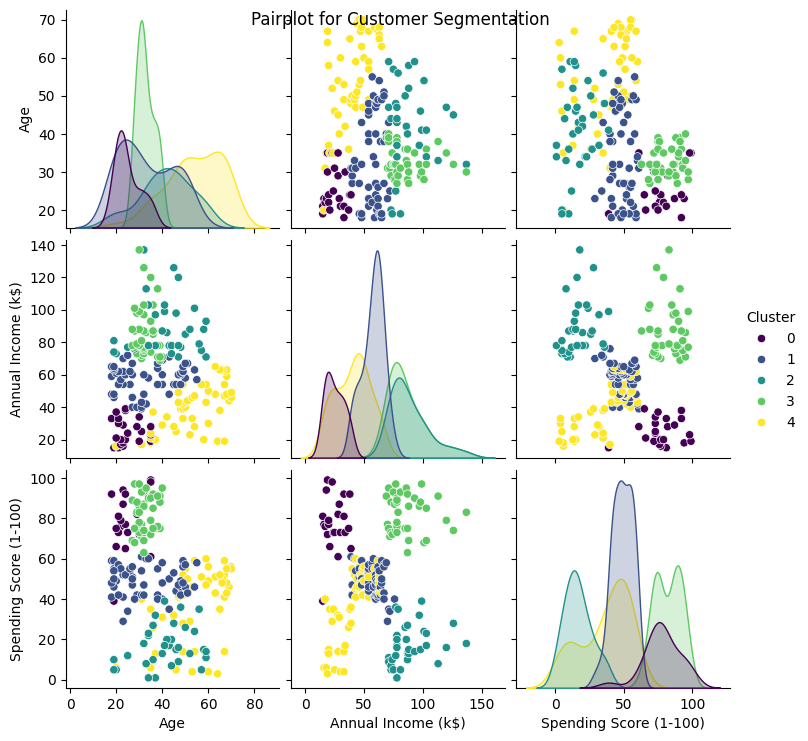

In [18]:
from sklearn.cluster import KMeans

# Assume that you want to cluster based on the 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' columns
kmeans = KMeans(n_clusters=5)  # Replace 5 with the number of clusters you want
kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Generate cluster labels
train_cluster_labels = kmeans.labels_

# Check the length of the cluster labels
print(len(train_cluster_labels))

# Check the shape of your dataframe
print(df.shape)

# If the lengths don't match, you can try to slice your dataframe to match the length of the cluster labels
if len(train_cluster_labels) < df.shape[0]:
    df = df.head(len(train_cluster_labels))

# Now you can assign the cluster labels to a new column in your dataframe
df['Cluster'] = train_cluster_labels

# Now you can create the pairplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot for Customer Segmentation')
plt.show()

# • Box Plots:
Generates box plots for each feature, showing the distribution within each cluster.

C:\Users\visha\AppData\Local\Temp\ipykernel_10440\4200729264.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')


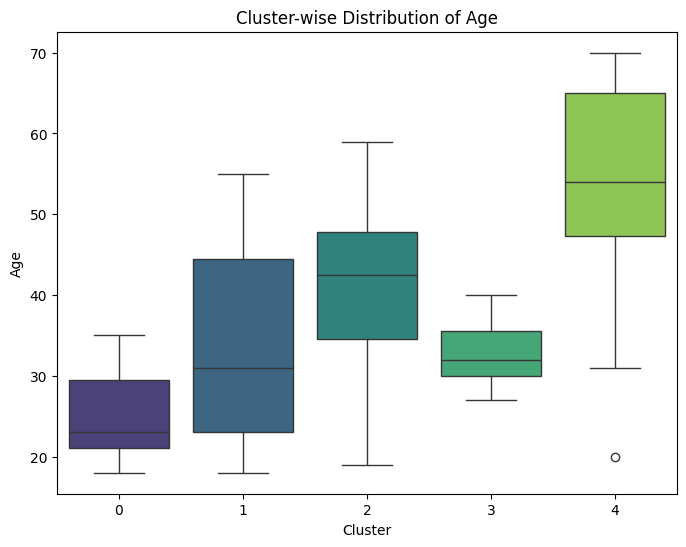

C:\Users\visha\AppData\Local\Temp\ipykernel_10440\4200729264.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')


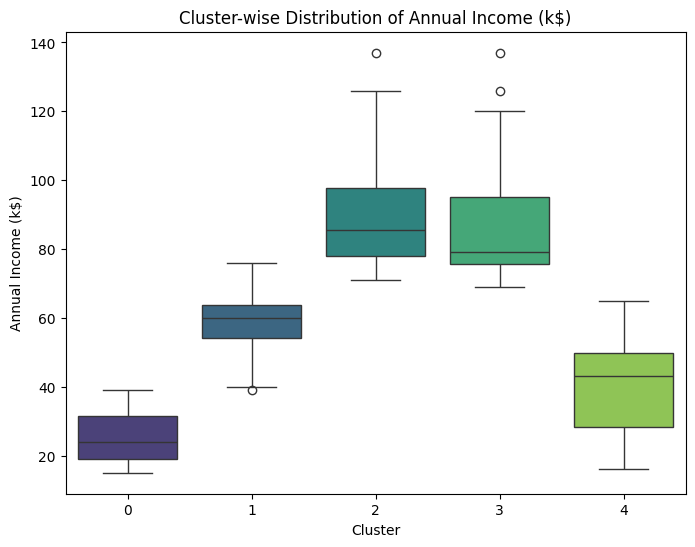

C:\Users\visha\AppData\Local\Temp\ipykernel_10440\4200729264.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')


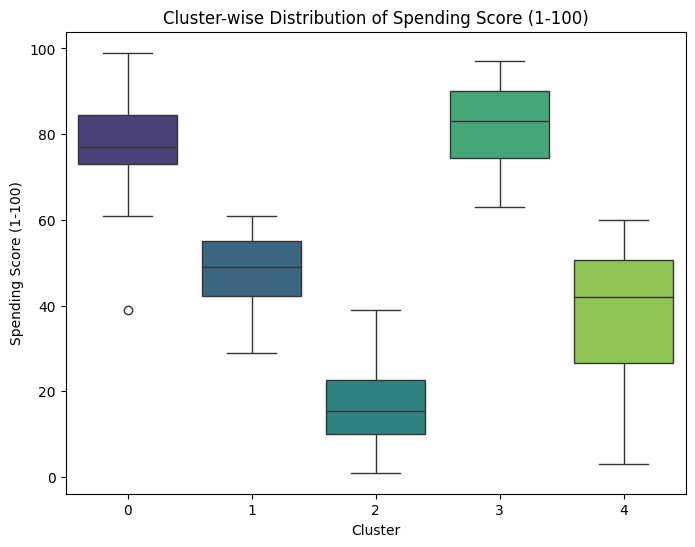

In [19]:
# Box plots for each feature by cluster
for feature in features.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')
    plt.title(f'Cluster-wise Distribution of {feature}')
    plt.show()

# • Silhouette Plot:

Evaluates cluster quality using silhouette coefficients and displays a silhouette plot to visualize the silhouette coefficients for each data point within its cluster. The red dashed line represents the average silhouette score for all data points.

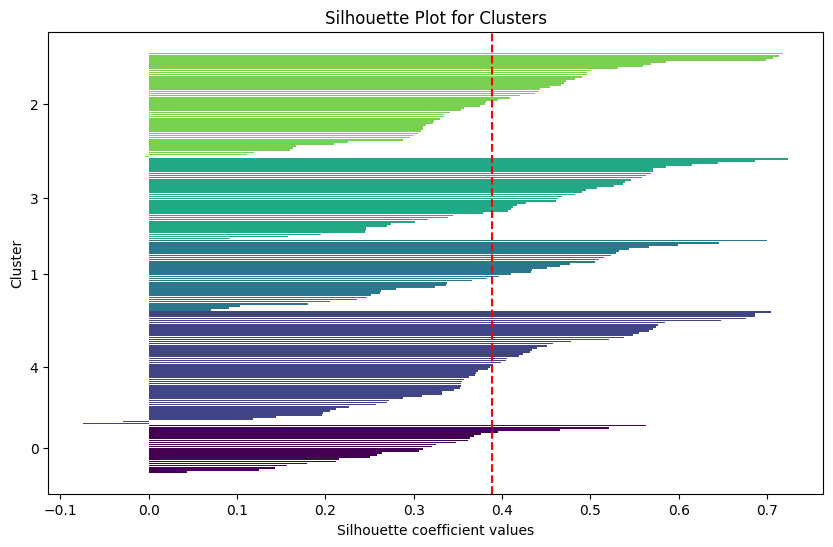

In [20]:
from sklearn.metrics import silhouette_samples  # Import silhouette_samples function
from mpl_toolkits.mplot3d import Axes3D

# Silhouette plot for evaluating cluster quality
silhouette_vals = silhouette_samples(scaled_features, cluster_labels)
plt.figure(figsize=(10, 6))
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(sorted(df['Cluster'].unique())):
    cluster_silhouette_vals = silhouette_vals[df['Cluster'] == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    color = plt.cm.viridis(float(i) / len(df['Cluster'].unique()))
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, color=color)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(y_ticks, df['Cluster'].unique())
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient values')
plt.title('Silhouette Plot for Clusters')
plt.show()


The silhouette plot measures how well data points fit into their clusters. Silhouette coefficients range from -1 to 1, with high values indicating good cluster fit. Using `silhouette_samples`, we compute coefficients for each point. The plot displays sorted coefficients as bars. Longer bars imply better cluster fit. The red line marks the average score. Higher, right-leaning bars signify well-separated clusters, validating cluster quality and choice.

In [21]:
from sklearn.metrics import silhouette_score, silhouette_samples

# Compute silhouette scores
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
silhouette_vals = silhouette_samples(scaled_features, cluster_labels)

# Print the average silhouette score
print(f'Average Silhouette Score: {silhouette_avg:.2f}')

# Print silhouette score for each sample (optional)
for i in range(optimal_clusters):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    print(f'Silhouette Score for Cluster {i}: {np.mean(cluster_silhouette_vals):.2f}')


Average Silhouette Score: 0.39
Silhouette Score for Cluster 0: 0.41
Silhouette Score for Cluster 1: 0.62
Silhouette Score for Cluster 2: 0.38
Silhouette Score for Cluster 3: 0.37
Silhouette Score for Cluster 4: 0.27



---
The silhouette score provides a quantitative measure of the quality of the clusters created by the K-means algorithm. A high average silhouette score (close to 1) indicates well-separated clusters. Understanding both the average silhouette score and individual sample scores helps assess the clustering model's effectiveness in grouping similar data points together."







---
# Conclusion:
this project successfully applied K-means clustering to group retail store customers based on their age, annual income, and spending score. The Elbow Method helped determine the optimal number of clusters, and the resulting clusters were visualized in a 3D graph. The silhouette score provided a quantitative evaluation of the clustering quality, ensuring meaningful customer segmentation. This analysis equips businesses with valuable insights into their customer base, allowing for targeted marketing strategies and personalized customer experiences. By understanding customer segments, businesses can enhance customer satisfaction and drive strategic decision-making.